In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [210]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [19]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [20]:
# columns name and type for Measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [84]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [21]:
# columns name and type for Station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [85]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
delta_date = dt.datetime.strptime(last_date[0], "%Y-%m-%d") - dt.timedelta(days=365) 
pd.to_datetime(delta_date).date()



datetime.date(2016, 8, 23)

In [141]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').\
        order_by(Measurement.date).all() # Sort the dataframe by date
precip

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [142]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(data=precip)
precip_df = precip_df.rename(columns={"date":"Date","prcp":"Precipitation"})
precip_df = precip_df.dropna() # remove rows with no data
precip_df = precip_df.set_index("Date")
precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


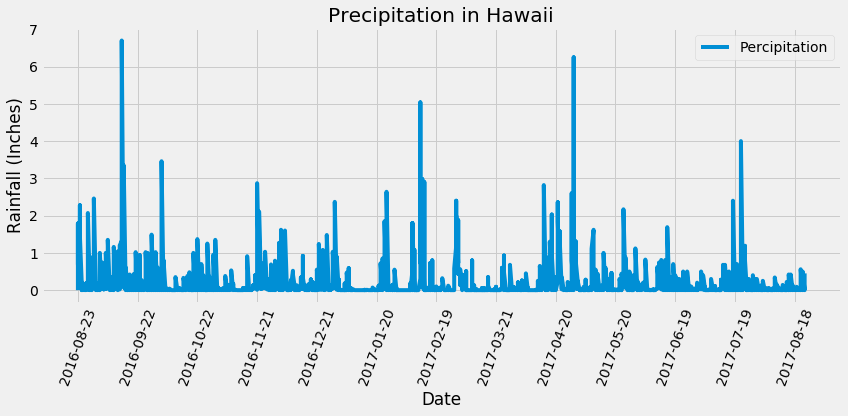

In [157]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (12,6))
plt.plot(precip_df['Precipitation'])
plt.title("Precipitation in Hawaii")
plt.xlabel('Date')
plt.ylabel('Rainfall (Inches)')

xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 30 != 0:
        xticks[i].set_visible(False)

plt.xticks(rotation=70)        
plt.legend(['Percipitation'])
plt.tight_layout()
plt.show()

In [158]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [159]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [167]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

'USC00519281'

In [197]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
                
temp = session.query(*sel).filter(Measurement.station==station_count[0][0]).all()
print(f"Min. temp: {temp[0][0]:.2f}ºF")
print(f"Max. temp: {temp[0][1]:.2f}ºF")
print(f"Avg. temp: {temp[0][2]:.2f}ºF")

Min. temp: 54.00ºF
Max. temp: 85.00ºF
Avg. temp: 71.66ºF


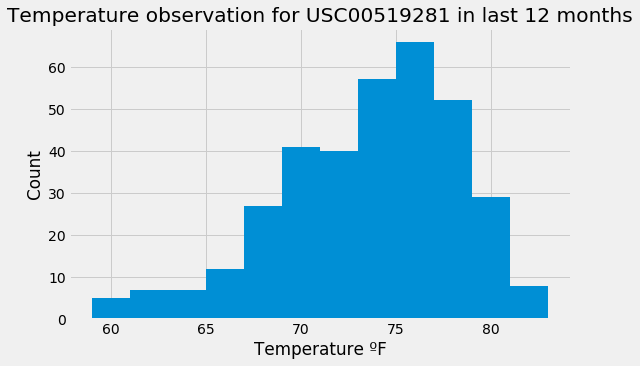

In [190]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_station = session.query(Measurement.tobs).\
                                filter(Measurement.station==station_count[0][0]).\
                                filter(Measurement.date >= delta_date).\
                                order_by(Measurement.date.desc()).all()

year_station_df = pd.DataFrame(year_station)

#Plotting Histogram
hist = year_station_df['tobs'].hist(bins=12,figsize=(8,5))

# Remove title
hist.set_title(f"Temperature observation for {station_count[0][0]} in last 12 months")

hist.set_xlabel("Temperature ºF")
hist.set_ylabel("Count")

plt.show()

## Bonus Challenge Assignment

In [189]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [199]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vaca_temp = calc_temps('2017-05-28', '2017-06-05')
print(f"Min. temp: {vaca_temp[0][0]:.2f}ºF")
print(f"Avg. temp: {vaca_temp[0][1]:.2f}ºF")
print(f"Max. temp: {vaca_temp[0][2]:.2f}ºF")

Min. temp: 71.00ºF
Avg. temp: 77.28ºF
Max. temp: 82.00ºF


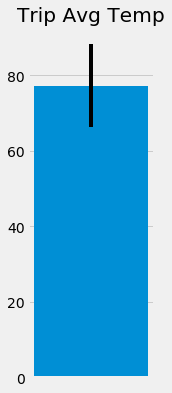

In [203]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.subplots(figsize=(2,6))
plt.bar(1,vaca_temp[0][1],yerr=vaca_temp[0][2]-vaca_temp[0][0])
plt.xticks([]) #remove xticks
plt.title("Trip Avg Temp")
plt.show()


In [213]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel=[Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,func.sum(Measurement.prcp)]

tot_amt=session.query(*sel).\
                       group_by(Measurement.station).\
                       order_by(desc(func.sum(Measurement.prcp))).\
                       filter(Measurement.date>='2017-05-28').\
                       filter(Measurement.date<='2017-06-05').\
                       filter(Measurement.station==Station.station).all()
tot_amt

[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.1999999999999997),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  1.0899999999999999),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.84),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.44),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.32000000000000006),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.26),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [214]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [309]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
s_date = '2017-05-28'
e_date = '2017-06-05'
s_date =  dt.datetime.strptime(s_date, '%Y-%m-%d')
e_date =  dt.datetime.strptime(e_date, '%Y-%m-%d')

# Use the start and end date to create a range of dates
date_list = [(s_date + dt.timedelta(days=x)).strftime("%Y-%m-%d") for x in range((e_date - s_date).days + 1)]

# Stip off the year and save a list of %m-%d strings
date_list_df = pd.DataFrame(date_list)
date_list_df[0] = date_list_df[0].str[5:]
date_list_df = date_list_df.rename(columns={0:"Date"})

# Loop through the list of %m-%d strings and calculate the normals for each date
for index, row in date_list_df.iterrows():
    print(f"------{row['Date']}------\
\nMin. temperature is {daily_normals(row['Date'])[0][0]:.2f}ºF.\
\nAvg. temperature is {daily_normals(row['Date'])[0][1]:.2f}ºF.\
\nMax. temperature is {daily_normals(row['Date'])[0][2]:.2f}ºF.\n")

------05-28------
Min. temperature is 67.00ºF.
Avg. temperature is 74.28ºF.
Max. temperature is 82.00ºF.

------05-29------
Min. temperature is 64.00ºF.
Avg. temperature is 74.20ºF.
Max. temperature is 80.00ºF.

------05-30------
Min. temperature is 69.00ºF.
Avg. temperature is 74.33ºF.
Max. temperature is 81.00ºF.

------05-31------
Min. temperature is 68.00ºF.
Avg. temperature is 74.40ºF.
Max. temperature is 81.00ºF.

------06-01------
Min. temperature is 64.00ºF.
Avg. temperature is 74.61ºF.
Max. temperature is 81.00ºF.

------06-02------
Min. temperature is 65.00ºF.
Avg. temperature is 74.40ºF.
Max. temperature is 81.00ºF.

------06-03------
Min. temperature is 65.00ºF.
Avg. temperature is 74.03ºF.
Max. temperature is 80.00ºF.

------06-04------
Min. temperature is 65.00ºF.
Avg. temperature is 73.82ºF.
Max. temperature is 81.00ºF.

------06-05------
Min. temperature is 68.00ºF.
Avg. temperature is 74.85ºF.
Max. temperature is 81.00ºF.



In [311]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals=[]
for index, row in date_list_df.iterrows():
    daily = daily_normals(row['Date'])[0]
    normals.append(tuple(daily))
normals

normals_df = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
normals_df['Date'] = date_list
normals_df = normals_df.set_index('Date')
normals_df

,tmin,tavg,tmax
Date,,,
2017-05-28,67.0,74.277778,82.0
2017-05-29,64.0,74.196078,80.0
2017-05-30,69.0,74.333333,81.0
2017-05-31,68.0,74.400000,81.0
2017-06-01,64.0,74.614035,81.0
2017-06-02,65.0,74.400000,81.0
2017-06-03,65.0,74.034483,80.0
2017-06-04,65.0,73.818182,81.0
2017-06-05,68.0,74.854545,81.0


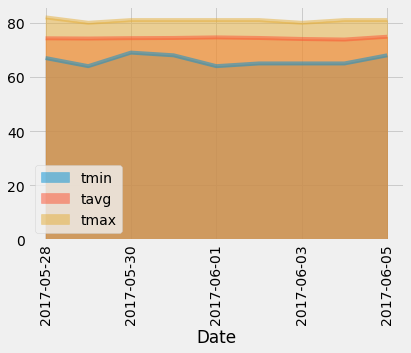

In [316]:
# Plot the daily normals as an area plot with `stacked=False`
ax = normals_df.plot.area(stacked=False)
plt.xticks(rotation=90)
plt.show()